Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7235 - val_loss: 0.7981
Epoch 2/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5884 - val_loss: 0.7867
Epoch 3/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5750 - val_loss: 0.7821
Epoch 4/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5641 - val_loss: 0.7809
Epoch 5/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5660 - val_loss: 0.7777
Epoch 6/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5696 - val_loss: 0.7745
Epoch 7/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5541 - val_loss: 0.7727
Epoch 8/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5549 - val_loss: 0.7728
Epoch 9/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5643 - val_loss: 0.7721
Epoch 10/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5511 - val_loss: 0.7712
Epoch 11/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5550 - val_loss: 0.7710
Epoch 12/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.

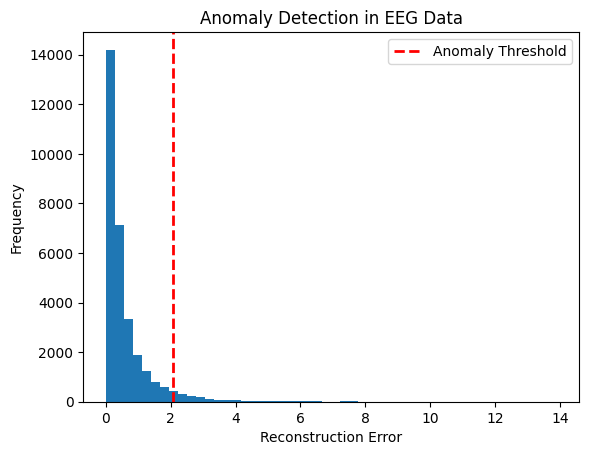

Total Anomalies Detected: 1550


In [4]:
# Import Required Libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import StandardScaler  # For feature normalization
from tensorflow import keras  # TensorFlow's deep learning framework
from tensorflow.keras import layers  # Layers for building neural networks

# Load the EEG Dataset
file_path = "s00.csv"  # Path to the dataset file
df = pd.read_csv(file_path)  # Load CSV file into a DataFrame

# Rename Columns
df.columns = [f'Channel_{i+1}' for i in range(df.shape[1])]

# Normalize the EEG Data
scaler = StandardScaler()  # Create a StandardScaler object
X = scaler.fit_transform(df)  # Normalize the data

# Define Autoencoder Model
def build_autoencoder(input_dim):
    encoder = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu')
    ])

    decoder = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(16,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(input_dim, activation='sigmoid')
    ])

    input_layer = keras.Input(shape=(input_dim,))
    encoded = encoder(input_layer)
    decoded = decoder(encoded)

    autoencoder = keras.Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

# Build and Train the Autoencoder
input_dim = X.shape[1]  # Number of EEG channels (features)
autoencoder = build_autoencoder(input_dim)  # Build autoencoder model
autoencoder.fit(X, X, epochs=50, batch_size=32, validation_split=0.2)  # Train model

# Compute Reconstruction Error (Anomaly Detection)
reconstructed = autoencoder.predict(X)  # Reconstruct EEG data
mse = np.mean(np.power(X - reconstructed, 2), axis=1)  # Compute Mean Squared Error (MSE)
threshold = np.percentile(mse, 95)  # Set threshold (95th percentile)
anomalies = mse > threshold  # Flag anomalies

# Plot MSE Distribution (Anomaly Threshold)
plt.hist(mse, bins=50)  # Histogram of reconstruction errors
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2, label='Anomaly Threshold')
plt.legend()
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Anomaly Detection in EEG Data")
plt.show()

# Output Number of Detected Anomalies
total_anomalies = np.sum(anomalies)  # Count total anomalies detected
print(f"Total Anomalies Detected: {total_anomalies}")
